## Introduction

## Importing Libraries and Loading Images

### Libraries

In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dense, Conv2D, Flatten
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

### Load Images

In [2]:
#Directory path
train_data_dir = 'chest_xray/train/'
test_data_dir = 'chest_xray/test/'
val_data_dir = 'chest_xray/val/'

In [3]:
#Get all the data in each generator and reshaping the images
train_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=500)

test_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=200)

val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        val_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=200)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
#Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

### Previewing Images

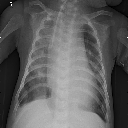

In [5]:
array_to_img(train_images[10])

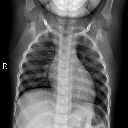

In [6]:
array_to_img(train_images[72])

## Images and Labels

### EDA of the Dataset

In [7]:
#exploring the data set
train_ex = train_images.shape[0]
num_px = train_images.shape[1]
test_ex = test_images.shape[0]
val_ex = val_images.shape[0]

print ("Number of training samples: " + str(train_ex))
print ("Number of testing samples: " + str(test_ex))
print ("Number of validation samples: " + str(val_ex))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 500
Number of testing samples: 200
Number of validation samples: 16
train_images shape: (500, 128, 128, 1)
train_labels shape: (500, 2)
test_images shape: (200, 128, 128, 1)
test_labels shape: (200, 2)
val_images shape: (16, 128, 128, 1)
val_labels shape: (16, 2)


### Images

In [8]:
# # Reshaping the images
# train_images = train_images.reshape(1200, -1).T
# test_images = test_images.reshape(150, -1).T
# val_images = val_images.reshape(16, -1).T

In [9]:
#Reshaping the images
#do we need this now?????
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

In [10]:
#Previewing the shape of images
print('Train Images:',np.shape(train_img))
print('Test Images:',np.shape(test_img))
print('Validation Images:',np.shape(val_img))

Train Images: (500, 16384)
Test Images: (200, 16384)
Validation Images: (16, 16384)


### Labels

In [11]:
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [12]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [13]:
# train_labels = y_train.T[[1]]
# test_labels = y_test.T[[1]]
# val_labels = y_val.T[[1]]

In [14]:
train_label = np.reshape(train_labels[:, 0], (500,1))
test_label = np.reshape(test_labels[:, 0], (200,1))
val_label = np.reshape(val_labels[:, 0], (16,1))

In [15]:
print('Train Labels:',np.shape(train_label))
print('Test Labels:',np.shape(test_label))
print('Validation Labels:',np.shape(val_label))

Train Labels: (500, 1)
Test Labels: (200, 1)
Validation Labels: (16, 1)


## Baseline Model

### Model

In [70]:
# Build a baseline fully connected model
np.random.seed(42)
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(16384, )))
# model.add(layers.Dense(8, activation='relu'))
# model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 131080    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 131,089
Trainable params: 131,089
Non-trainable params: 0
_________________________________________________________________


In [72]:
#Creating a Compile
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
#Creating history variable
history_bl = model.fit(train_img,
                    train_label,
                    epochs=100,
                    batch_size=80,
                    validation_data=(val_img, val_label))

Epoch 1/100
7/7 [==============================] - 0s 20ms/step - loss: 0.6740 - accuracy: 0.6640 - val_loss: 0.7298 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5779 - accuracy: 0.7240 - val_loss: 0.7747 - val_accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5606 - accuracy: 0.7240 - val_loss: 0.8437 - val_accuracy: 0.5000
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5625 - accuracy: 0.7240 - val_loss: 0.9298 - val_accuracy: 0.5000
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5447 - accuracy: 0.7240 - val_loss: 0.9464 - val_accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5251 - accuracy: 0.7240 - val_loss: 0.6848 - val_accuracy: 0.5000
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5100 - accuracy: 0.7240 - val_loss: 0.7605 - val_accuracy: 0.5000
Epoch 8/100
7/7 [=========

7/7 [==============================] - 0s 8ms/step - loss: 0.1554 - accuracy: 0.9460 - val_loss: 0.5357 - val_accuracy: 0.7500
Epoch 60/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1481 - accuracy: 0.9440 - val_loss: 0.3757 - val_accuracy: 0.8750
Epoch 61/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1541 - accuracy: 0.9520 - val_loss: 0.7483 - val_accuracy: 0.6875
Epoch 62/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1494 - accuracy: 0.9340 - val_loss: 0.5523 - val_accuracy: 0.7500
Epoch 63/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2236 - accuracy: 0.9040 - val_loss: 0.4108 - val_accuracy: 0.7500
Epoch 64/100
7/7 [==============================] - 0s 8ms/step - loss: 0.3260 - accuracy: 0.8680 - val_loss: 0.4406 - val_accuracy: 0.8750
Epoch 65/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1597 - accuracy: 0.9320 - val_loss: 0.5714 - val_accuracy: 0.6875
Epoch 66/100
7/7 [===============

### Results

In [74]:
def model_results(tr_img, tr_lab, te_img, te_lab):
    result_train = model.evaluate(tr_img, tr_lab)
    results_test = model.evaluate(te_img, te_lab)
    print(result_train)
    print(results_test)

In [75]:
def model_graphs(hist):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [76]:
model_results(train_img, train_label, test_img, test_label)

7/7 [==============================] - 0s 2ms/step - loss: 0.9511 - accuracy: 0.7150
[0.1519564390182495, 0.9319999814033508]
[0.9511342644691467, 0.7149999737739563]


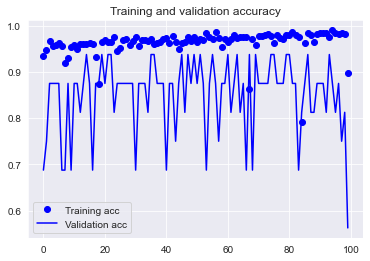

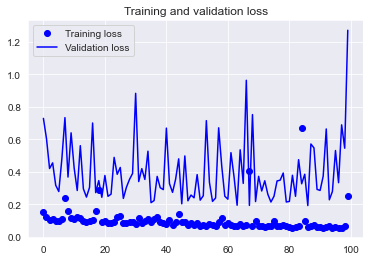

In [34]:
model_graphs(history_bl)

## CNN

### Datagenerator

In [35]:
#Get all of the data into each generator and modify the images
train_regen = ImageDataGenerator(rescale=1./255)
test_regen = ImageDataGenerator(rescale=1./255)
val_regen = ImageDataGenerator(rescale=1./255)

In [36]:
train_generator = train_regen.flow_from_directory(train_data_dir,
                                                  target_size = (128, 128),
                                                  batch_size = 500,
                                                  color_mode = 'grayscale',
                                                  class_mode = 'binary')
                                                  
test_generator = test_regen.flow_from_directory(test_data_dir,
                                                target_size = (128, 128),
                                                batch_size = 200,
                                                color_mode = 'grayscale',
                                                class_mode = 'binary')

val_generator = val_regen.flow_from_directory(val_data_dir,
                                              target_size = (128, 128),
                                              batch_size = 200,
                                              color_mode = 'grayscale',
                                              class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [37]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)
X_val, y_val = next(val_generator)

### Model

In [38]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)      

In [40]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [41]:
history_cnn = model.fit(train_generator, 
                    steps_per_epoch = len(X_train)//500, 
                    epochs= 30, 
                    validation_data=val_generator, 
                    validation_steps = len(X_test)//200)

Epoch 1/30
1/1 [==============================] - 1s 613ms/step - loss: 0.7021 - accuracy: 0.2640 - val_loss: 0.7096 - val_accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 167ms/step - loss: 0.6348 - accuracy: 0.7360 - val_loss: 0.7625 - val_accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 189ms/step - loss: 0.6020 - accuracy: 0.7260 - val_loss: 0.8081 - val_accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 184ms/step - loss: 0.5812 - accuracy: 0.7420 - val_loss: 0.8189 - val_accuracy: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 206ms/step - loss: 0.5868 - accuracy: 0.7361 - val_loss: 0.7897 - val_accuracy: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 181ms/step - loss: 0.5798 - accuracy: 0.7340 - val_loss: 0.8237 - val_accuracy: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 190ms/step - loss: 0.5484 - accuracy: 0.7593 - val_loss: 0.8520 - val_accuracy: 0.5000
Epoch 8/30
1/1 [====

### Results

In [77]:
model_results(X_train, y_train, X_test, y_test)

ValueError: in user code:

    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected axis -1 of input shape to have value 16384 but received input with shape [None, 128, 128, 1]


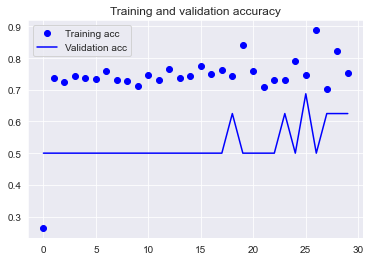

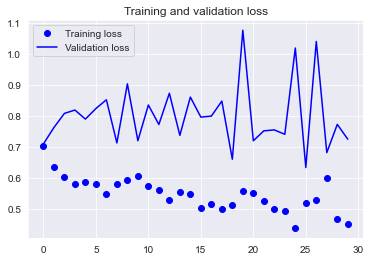

In [42]:
model_graphs(history_cnn)

## Data Augmentation

### Class Imbalance

>Quick EDAs to see the severity of class imbalance

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [45]:
def imbalance_graphs(data_list):
    
    empty = []
    
    for i in data_list:
        if(i[1] == 0):
            empty.append("NORMAL")
        else:
            empty.append("PNEUMONIA")
    sns.countplot(empty);     

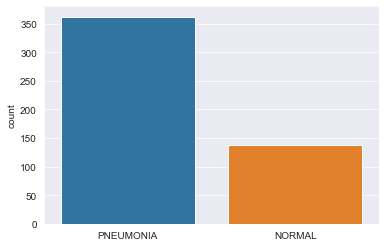

In [49]:
imbalance_graphs(train_labels)

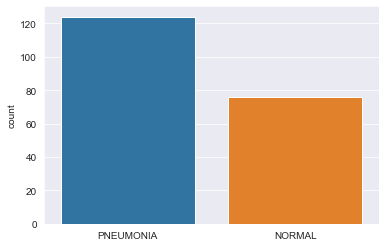

In [50]:
imbalance_graphs(test_labels)

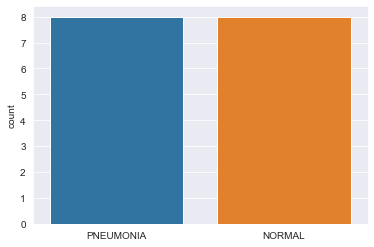

In [51]:
imbalance_graphs(val_labels)

Both the train set and test has a severe class imbalance so we will need to preform some data augmentation to create more normal images to match the number of pneumonia images. Whereas the validation set is equal so it will not need any adjustment.

### Augmentation Generator

In [52]:
train_aug_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.3, 
                                   height_shift_range=0.2, 
                                   zoom_range=0.2, 
                                   vertical_flip=True)

In [53]:
test_aug_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.3, 
                                   height_shift_range=0.2,  
                                   zoom_range=0.2, 
                                   vertical_flip=True)

In [61]:
#Get all the data in each generator and reshaping the images
train_generator = train_aug_gen.flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=500)

test_generator = test_aug_gen.flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=200)

val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        val_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=200)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Model

In [62]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128,  1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 32)        16416     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [64]:
# steps_per_epoch = len(X_train)//500, 
#                     epochs= 30, 
#                     validation_data=val_generator, 
#                     validation_steps = len(X_test)//200

In [65]:
history_da = model.fit(train_generator, 
                    steps_per_epoch = 5, 
                    epochs= 30, 
                    validation_data=val_generator, 
                    validation_steps = 5)

Epoch 1/30
5/5 [==============================] - 25s 5s/step - loss: 0.6935 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/30
5/5 [==============================] - 30s 6s/step - loss: 0.6933 - acc: 0.5000
Epoch 3/30
5/5 [==============================] - 23s 5s/step - loss: 0.6933 - acc: 0.5000
Epoch 4/30
5/5 [==============================] - 25s 5s/step - loss: 0.6932 - acc: 0.5000
Epoch 5/30
5/5 [==============================] - 27s 5s/step - loss: 0.6932 - acc: 0.5000
Epoch 6/30
5/5 [==============================] - 25s 5s/step - loss: 0.6932 - acc: 0.5000
Epoch 7/30
5/5 [==============================] - 21s 4s/step - loss: 0.6932 - acc: 0.5000
Epoch 8/30
4/5 [=======================>......] - ETA: 4s - loss: 0.6932 - acc: 0.5000

KeyboardInterrupt: 

### Results

In [ ]:
# test_images, test_l = next(test_generator)
# results_test = model.evaluate(test_images, test_l)
# results_test

In [ ]:
model_results(X_train, y_train, X_test, y_test)

In [ ]:
model_graphs(history_da)

## Final Model CNN

### Model

### Results

## Conclusion